<a href="https://colab.research.google.com/github/salwazpw/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**Konvolusi Tanpa Library**

**Membuat fungsi konvlusi**

Fungsi konvolusi

1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra

In [116]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**Sharpen**

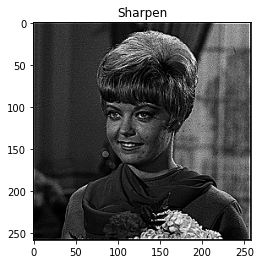

In [128]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img_conv = convolution2d(img_gray, kernel_sharpen, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Sharpen')
plt.imshow(img_conv_norm,cmap='gray')

**Emboss**

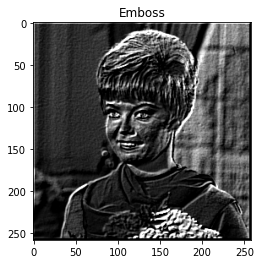

In [132]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

img_conv = convolution2d(img_gray, kernel_emboss, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Emboss')
plt.imshow(img_conv_norm,cmap='gray')

**Left Sobel Edge Detection**

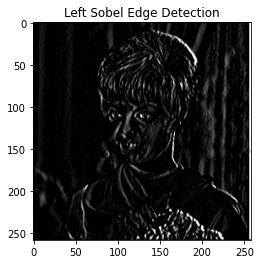

In [131]:
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

img_conv = convolution2d(img_gray, kernel_sobel, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Left Sobel Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

**Canny Edge Detection**

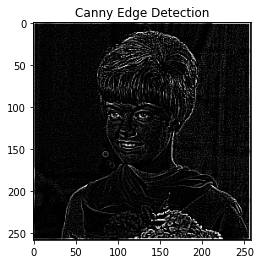

In [130]:
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

img_conv = convolution2d(img_gray, kernel_canny, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Canny Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

**Prewitt Edge Detection**

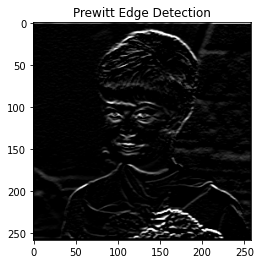

In [129]:
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

img_conv = convolution2d(img_gray, kernel_prewitt, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Prewitt Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

**5x5 Gaussian Blur**

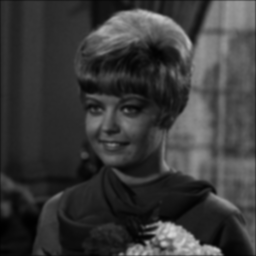

In [127]:
kernel_gaussian = np.array([[1,4,6,4,1],
                         [4,16,24,16,4],
                         [6,24,36,24,6],
                         [4,16,24,16,4],
                         [1,4,6,4,1]])/256.0

cv2_imshow(convolution2d(img_gray, kernel_gaussian,1,2))

**21x21 Gaussian Blur**

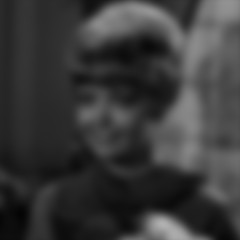

In [124]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))